<a href="https://colab.research.google.com/github/kanjamwingirwa/Quantium_DataAnalytics_Internship/blob/kanja/Quantium_DataAnalytics_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt
import warnings
import plotly.express as px
warnings. filterwarnings("ignore")

In [2]:
#Let us begin by loading the datasets
purchase_behaviour_df = pd.read_csv('/content/QVI_purchase_behaviour.csv')
purchase_behaviour_df.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
purchase_behaviour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [4]:
#Let us begin by loading the datasets
transaktions_df = pd.read_excel('/content/QVI_transaction_data.xlsx')
transaktions_df.tail(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,43365,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


In [5]:
transaktions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


# **Data Cleaning**

In [6]:
#let's check for null values
transaktions_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [7]:
purchase_behaviour_df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

There are no null values to speak of.

In [8]:
#let's parse the dates

# Rename date column and separate into year, month, day etc
transaktions_df['Date'] = pd.to_datetime(transaktions_df['DATE'],errors='coerce',unit='d',origin='1900-01-01')
transaktions_df['Year'] = transaktions_df['Date'].dt.year
transaktions_df['Month'] = transaktions_df['Date'].dt.month
transaktions_df['DayOfWeek']  = transaktions_df['Date'].dt.day_name()

In [9]:
transaktions_df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday


In [10]:
#lets change some columns into objects as they dont represent actual integers
transaktions_df['STORE_NBR'] = transaktions_df['STORE_NBR'].astype('object')
transaktions_df['LYLTY_CARD_NBR'] = transaktions_df['LYLTY_CARD_NBR'].astype('object')
transaktions_df['PROD_NBR'] = transaktions_df['PROD_NBR'].astype('object')
transaktions_df['TXN_ID'] = transaktions_df['TXN_ID'].astype('object')

In [11]:
#let's check to see if the changes have been implemented
transaktions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  int64         
 1   STORE_NBR       264836 non-null  object        
 2   LYLTY_CARD_NBR  264836 non-null  object        
 3   TXN_ID          264836 non-null  object        
 4   PROD_NBR        264836 non-null  object        
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
 8   Date            264836 non-null  datetime64[ns]
 9   Year            264836 non-null  int64         
 10  Month           264836 non-null  int64         
 11  DayOfWeek       264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 24.2+ MB


In [12]:
#lets delete the date column as it no longer matters

transaktions_df = transaktions_df.drop(['DATE'], axis=1)
transaktions_df.head(5)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-22,2019,5,Wednesday
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-19,2018,8,Sunday
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-20,2018,8,Monday


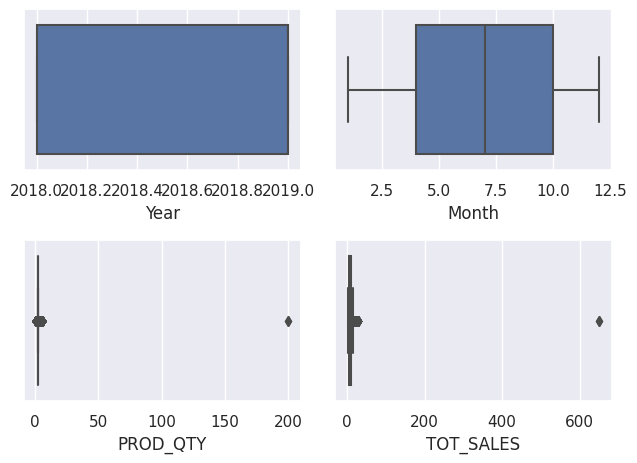

In [13]:
#let's look for outliers

#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 3 columns)
fig, axes = plt.subplots(2, 2)

#create boxplot in each subplot
sns.boxplot(x=transaktions_df['Year'], ax=axes[0,0])


sns.boxplot(x=transaktions_df ['Month'], ax=axes[0,1])
sns.boxplot(x=transaktions_df['PROD_QTY'], ax=axes[1,0])
sns.boxplot(x=transaktions_df['TOT_SALES'], ax=axes[1,1])

plt.tight_layout()

There are outliers in two columns that we have to deal with

In [14]:
transaktions_df.head(2)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday


In [15]:
#lets see exactly where the outlier is
outlier_df = transaktions_df.loc[(transaktions_df["PROD_QTY"]> 50) | (transaktions_df["TOT_SALES"] > 200)]

In [16]:
outlier_df.head(5)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek
69762,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,2018-08-21,2018,8,Tuesday
69763,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,2019-05-22,2019,5,Wednesday


As we can see, these two transactions come from the same loyalty card number and hence, its probably a customer with special needs.

In [17]:
transaktions_df = transaktions_df.drop([69762, 69763])

In [18]:
transaktions_df.head(5 )

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-22,2019,5,Wednesday
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-19,2018,8,Sunday
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-20,2018,8,Monday


<Axes: xlabel='TOT_SALES'>

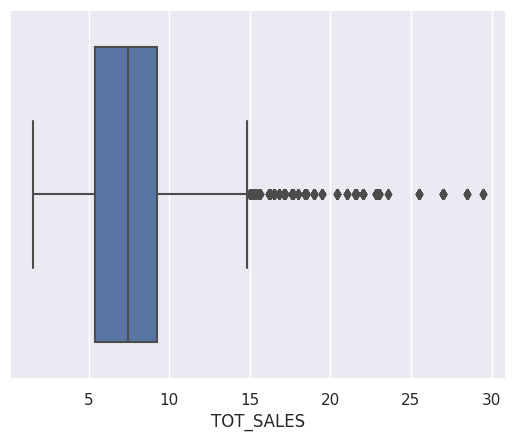

In [19]:
#let's look for outliers

#set seaborn plotting aesthetics as default
sns.set()
sns.boxplot(x=transaktions_df['TOT_SALES'])

<Axes: xlabel='PROD_QTY'>

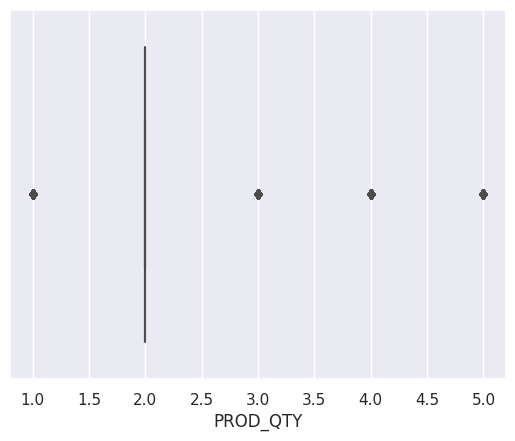

In [20]:

#set seaborn plotting aesthetics as default
sns.set()
sns.boxplot(x=transaktions_df['PROD_QTY'])

In [21]:
transaktions_df.describe()

,PROD_QTY,TOT_SALES,Year,Month
count,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.905813,7.299346,2018.500687,6.535943
std,0.343436,2.527241,0.500000,3.448682
min,1.000000,1.500000,2018.000000,1.000000
25%,2.000000,5.400000,2018.000000,4.000000
50%,2.000000,7.400000,2019.000000,7.000000
75%,2.000000,9.200000,2019.000000,10.000000
max,5.000000,29.500000,2019.000000,12.000000


We shall keep all the other outliers as they are not extreme.

In [22]:
# Extracting first name from product name which is the brand name
transaktions_df['BRAND_NAME']=transaktions_df['PROD_NAME'].apply(lambda x: x.split(" ")[0])

In [23]:
transaktions_df.head(2)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek,BRAND_NAME
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday,Natural
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday,CCs


In [24]:
# extracting the last word from product namewhich is the pkg details
transaktions_df['PROD_WGT']=transaktions_df['PROD_NAME'].apply(lambda x: x.split(" ")[-1])

In [25]:
transaktions_df.head(5)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek,BRAND_NAME,PROD_WGT
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday,Natural,SeaSalt175g
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday,CCs,175g
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-22,2019,5,Wednesday,Smiths,170g
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-19,2018,8,Sunday,Smiths,175g
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-20,2018,8,Monday,Kettle,150g


In [26]:
# removing the first word from product name
transaktions_df['PROD_DESC'] = transaktions_df['PROD_NAME'].str.split(n=1).str[1]

In [27]:
transaktions_df.head(3)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek,BRAND_NAME,PROD_WGT,PROD_DESC
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday,Natural,SeaSalt175g,Chip Compny SeaSalt175g
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday,CCs,175g,Nacho Cheese 175g
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-22,2019,5,Wednesday,Smiths,170g,Crinkle Cut Chips Chicken 170g


In [28]:
# also removing the last word further to get the product description
transaktions_df['PROD_DESC']=transaktions_df['PROD_DESC'].str.rsplit(' ',1).str[0]

In [29]:
transaktions_df.head(3)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek,BRAND_NAME,PROD_WGT,PROD_DESC
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday,Natural,SeaSalt175g,Chip Compny
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday,CCs,175g,Nacho Cheese
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-22,2019,5,Wednesday,Smiths,170g,Crinkle Cut Chips Chicken


In [30]:

transaktions_df['PROD_DESC'] = transaktions_df['PROD_DESC']+' '+transaktions_df['PROD_WGT'].str[:-4]

In [31]:
transaktions_df.head(5)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek,BRAND_NAME,PROD_WGT,PROD_DESC
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday,Natural,SeaSalt175g,Chip Compny SeaSalt
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday,CCs,175g,Nacho Cheese
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-22,2019,5,Wednesday,Smiths,170g,Crinkle Cut Chips Chicken
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-19,2018,8,Sunday,Smiths,175g,Chip Thinly S/Cream&Onion
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-20,2018,8,Monday,Kettle,150g,Tortilla ChpsHny&Jlpno Chili


In [32]:
#extracting only numeric characters
transaktions_df['PROD_WGT']= transaktions_df.PROD_WGT.str.extract('(\d+)')

In [33]:
transaktions_df.head(3)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek,BRAND_NAME,PROD_WGT,PROD_DESC
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday,Natural,175,Chip Compny SeaSalt
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday,CCs,175,Nacho Cheese
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-22,2019,5,Wednesday,Smiths,170,Crinkle Cut Chips Chicken


In [34]:
#lets look at our new dataset
transaktions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264835
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   STORE_NBR       264834 non-null  object        
 1   LYLTY_CARD_NBR  264834 non-null  object        
 2   TXN_ID          264834 non-null  object        
 3   PROD_NBR        264834 non-null  object        
 4   PROD_NAME       264834 non-null  object        
 5   PROD_QTY        264834 non-null  int64         
 6   TOT_SALES       264834 non-null  float64       
 7   Date            264834 non-null  datetime64[ns]
 8   Year            264834 non-null  int64         
 9   Month           264834 non-null  int64         
 10  DayOfWeek       264834 non-null  object        
 11  BRAND_NAME      264834 non-null  object        
 12  PROD_WGT        261577 non-null  object        
 13  PROD_DESC       264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), in

There are missing values in product_Weight, lets deal with that

In [35]:
#filling the missing values
transaktions_df['PROD_WGT'].mode()

0    175
Name: PROD_WGT, dtype: object

In [36]:
#fill the age column with 39 which is the mean
transaktions_df['PROD_WGT'].fillna(value=175, inplace=True)

In [37]:
transaktions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264835
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   STORE_NBR       264834 non-null  object        
 1   LYLTY_CARD_NBR  264834 non-null  object        
 2   TXN_ID          264834 non-null  object        
 3   PROD_NBR        264834 non-null  object        
 4   PROD_NAME       264834 non-null  object        
 5   PROD_QTY        264834 non-null  int64         
 6   TOT_SALES       264834 non-null  float64       
 7   Date            264834 non-null  datetime64[ns]
 8   Year            264834 non-null  int64         
 9   Month           264834 non-null  int64         
 10  DayOfWeek       264834 non-null  object        
 11  BRAND_NAME      264834 non-null  object        
 12  PROD_WGT        264834 non-null  object        
 13  PROD_DESC       264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), in

In [38]:
transaktions_df.tail(20)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek,BRAND_NAME,PROD_WGT,PROD_DESC
264816,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6,2019-05-31,2019,5,Friday,Cobs,110,Popd Sea Salt Chips
264817,271,271193,269367,95,Sunbites Whlegrn Crisps Frch/Onin 90g,2,3.4,2019-06-19,2019,6,Wednesday,Sunbites,90,Whlegrn Crisps Frch/Onin
264818,272,272010,269644,49,Infuzions SourCream&Herbs Veg Strws 110g,2,7.6,2019-03-10,2019,3,Sunday,Infuzions,110,SourCream&Herbs Veg Strws
264819,272,272053,269703,46,Kettle Original 175g,2,10.8,2019-06-17,2019,6,Monday,Kettle,175,Original
264820,272,272105,269790,62,Pringles Mystery Flavour 134g,2,7.4,2018-08-30,2018,8,Thursday,Pringles,134,Mystery Flavour
264821,272,272105,269792,32,Kettle Sea Salt And Vinegar 175g,2,10.8,2019-05-31,2019,5,Friday,Kettle,175,Sea Salt And Vinegar
264822,272,272148,269843,34,Pringles Slt Vingar 134g,2,7.4,2018-08-02,2018,8,Thursday,Pringles,134,Slt Vingar
264823,272,272156,269855,63,Kettle 135g Swt Pot Sea Salt,2,8.4,2019-03-19,2019,3,Tuesday,Kettle,175,135g Swt Pot Sea
264824,272,272193,269906,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,1,4.6,2019-03-15,2019,3,Friday,Kettle,150,Tortilla ChpsBtroot&Ricotta
264825,272,272194,269907,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6,2019-01-23,2019,1,Wednesday,Infuzions,110,BBQ Rib Prawn Crackers


In [39]:
#we still need to do a little more cleaning in the 'PROD_DESC' column
import re
import string

def clean_text(text):
    '''Make text lowercase,remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

clean = lambda x: clean_text(x)

In [40]:
transaktions_df['PROD_DESC'] = transaktions_df.PROD_DESC.apply(clean)

In [41]:
transaktions_df.tail(20)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek,BRAND_NAME,PROD_WGT,PROD_DESC
264816,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6,2019-05-31,2019,5,Friday,Cobs,110,popd sea salt chips
264817,271,271193,269367,95,Sunbites Whlegrn Crisps Frch/Onin 90g,2,3.4,2019-06-19,2019,6,Wednesday,Sunbites,90,whlegrn crisps frchonin
264818,272,272010,269644,49,Infuzions SourCream&Herbs Veg Strws 110g,2,7.6,2019-03-10,2019,3,Sunday,Infuzions,110,sourcreamherbs veg strws
264819,272,272053,269703,46,Kettle Original 175g,2,10.8,2019-06-17,2019,6,Monday,Kettle,175,original
264820,272,272105,269790,62,Pringles Mystery Flavour 134g,2,7.4,2018-08-30,2018,8,Thursday,Pringles,134,mystery flavour
264821,272,272105,269792,32,Kettle Sea Salt And Vinegar 175g,2,10.8,2019-05-31,2019,5,Friday,Kettle,175,sea salt and vinegar
264822,272,272148,269843,34,Pringles Slt Vingar 134g,2,7.4,2018-08-02,2018,8,Thursday,Pringles,134,slt vingar
264823,272,272156,269855,63,Kettle 135g Swt Pot Sea Salt,2,8.4,2019-03-19,2019,3,Tuesday,Kettle,175,swt pot sea
264824,272,272193,269906,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,1,4.6,2019-03-15,2019,3,Friday,Kettle,150,tortilla chpsbtrootricotta
264825,272,272194,269907,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6,2019-01-23,2019,1,Wednesday,Infuzions,110,bbq rib prawn crackers


In [42]:
transaktions_df['PROD_DESC'].value_counts()

original                         4673
mozzarella   basil  pesto        3304
tortilla chpshnyjlpno chili      3296
popd swtchlli srcream chips      3269
crisps     ched  chives          3268
                                 ... 
pc sea salt                      1431
medium   salsa                   1430
sour cream     garden chives     1419
fries potato chips               1418
crinkle cut      original        1410
Name: PROD_DESC, Length: 113, dtype: int64

In [43]:
pd.set_option("display.max_rows", None)

In [44]:
transaktions_df['PROD_DESC'].value_counts()

original                            4673
mozzarella   basil  pesto           3304
tortilla chpshnyjlpno chili         3296
popd swtchlli srcream chips         3269
crisps     ched  chives             3268
popd sea salt  chips                3265
 swt pot sea                        3257
splash of  lime                     3252
thai sweetchili potatomix           3242
crnkle chip  orgnl big bag          3233
potato chips  hot  spicy            3229
sensations   camembert  fig         3219
corn chips  cheese supreme          3217
barbeque                            3210
corn chip mexican jalapeno          3204
sweet chilli and sour cream         3200
crinkle chips salt  vinegar         3197
chips light  tangy                  3188
corn chp     supreme                3183
sweetspcy bbq                       3177
crisps     lightly salted           3174
bbq rib   prawn crackers            3174
sea salt     and vinegar            3173
corn chip southern chicken          3172
 chicken        

In [45]:
transaktions_df['BRAND_NAME'].value_counts()

Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND_NAME, dtype: int64

In [46]:
transaktions_df['BRAND_NAME'].replace({'WW': 'Woolworths', 'Dorito': 'Doritos', 'Snbts': 'Sunbites', 'Infzns':'Infuzions', 'NCC':'Natural', 'GrnWves':'Grain', 'Smith': 'Smiths'}, inplace=True)
transaktions_df.head(2)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek,BRAND_NAME,PROD_WGT,PROD_DESC
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday,Natural,175,chip compny seasalt
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday,CCs,175,nacho cheese


In [47]:
transaktions_df['BRAND_NAME'].value_counts()

Kettle        41288
Smiths        31823
Doritos       28145
Pringles      25102
Woolworths    14757
Infuzions     14201
Thins         14075
RRD           11894
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Grain          7740
Natural        7469
Tyrrells       6442
Red            5885
Cheezels       4603
CCs            4551
Sunbites       3008
Cheetos        2927
Burger         1564
French         1418
Name: BRAND_NAME, dtype: int64

Let's Merge the two datasets

In [48]:
transaktions_df.head(2)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek,BRAND_NAME,PROD_WGT,PROD_DESC
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-19,2018,10,Friday,Natural,175,chip compny seasalt
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-16,2019,5,Thursday,CCs,175,nacho cheese


In [49]:
purchase_behaviour_df.head(2)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream


In [50]:
combined_df = pd.merge(purchase_behaviour_df,transaktions_df,on='LYLTY_CARD_NBR')
combined_df.tail(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date,Year,Month,DayOfWeek,BRAND_NAME,PROD_WGT,PROD_DESC
264829,2370701,YOUNG FAMILIES,Mainstream,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,2018-12-10,2018,12,Monday,Grain,210,waves sweet chilli
264830,2370751,YOUNG FAMILIES,Premium,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,2018-10-03,2018,10,Wednesday,Kettle,150,tortilla chpsfetagarlic
264831,2370961,OLDER FAMILIES,Budget,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,2018-10-26,2018,10,Friday,Tyrrells,165,crisps lightly salted
264832,2370961,OLDER FAMILIES,Budget,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,2018-10-29,2018,10,Monday,Old,300,el paso salsa dip chnky tom ht
264833,2373711,YOUNG SINGLES/COUPLES,Mainstream,88,241815,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4,2018-12-16,2018,12,Sunday,Smiths,330,crinkle chips salt vinegar


In [51]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264833
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  object        
 1   LIFESTAGE         264834 non-null  object        
 2   PREMIUM_CUSTOMER  264834 non-null  object        
 3   STORE_NBR         264834 non-null  object        
 4   TXN_ID            264834 non-null  object        
 5   PROD_NBR          264834 non-null  object        
 6   PROD_NAME         264834 non-null  object        
 7   PROD_QTY          264834 non-null  int64         
 8   TOT_SALES         264834 non-null  float64       
 9   Date              264834 non-null  datetime64[ns]
 10  Year              264834 non-null  int64         
 11  Month             264834 non-null  int64         
 12  DayOfWeek         264834 non-null  object        
 13  BRAND_NAME        264834 non-null  object        
 14  PROD

#**Univariate Analysis**

In [52]:

total_customers = combined_df['LYLTY_CARD_NBR'].nunique()
print(total_customers)

72636


Assuming each unique customer gets a loyalty card number, there are 72,636 customers

In [58]:
total_sales = combined_df['TOT_SALES'].sum()
print(total_sales)

1933114.9999999998


The total sales were estimated at about 1,933,114

In [54]:
#top 10 most popular brands
top_10_brands = (combined_df['BRAND_NAME'].value_counts()).iloc[:10]
print(top_10_brands)

Kettle        41288
Smiths        31823
Doritos       28145
Pringles      25102
Woolworths    14757
Infuzions     14201
Thins         14075
RRD           11894
Cobs           9693
Tostitos       9471
Name: BRAND_NAME, dtype: int64


<Axes: title={'center': 'Top 10 Most Popular brands'}>

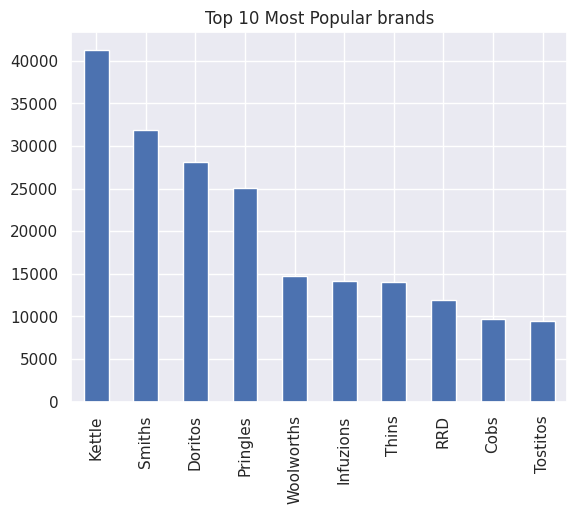

In [55]:
#let show this in a bar char
top_10_brands.plot(kind = 'bar', title = 'Top 10 Most Popular brands')

In [56]:
#bottom 10 Most popular products
bottom_10_Popular = (combined_df['BRAND_NAME'].value_counts()).iloc[-10:]
print(bottom_10_Popular)


Grain       7740
Natural     7469
Tyrrells    6442
Red         5885
Cheezels    4603
CCs         4551
Sunbites    3008
Cheetos     2927
Burger      1564
French      1418
Name: BRAND_NAME, dtype: int64


<Axes: title={'center': 'Ten Least Most Popular brands'}>

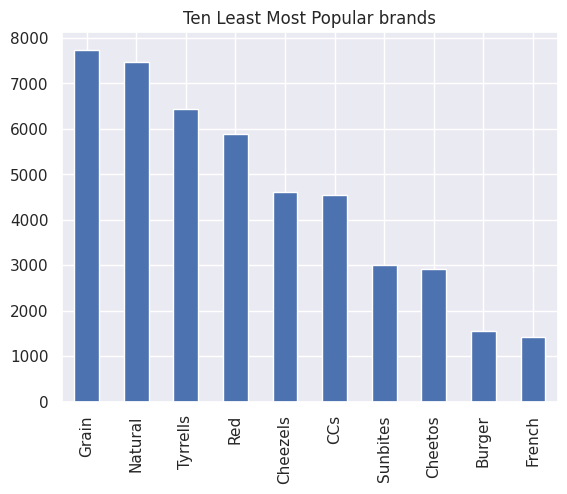

In [57]:
#let show this in a bar char
bottom_10_Popular.plot(kind = 'bar', title = 'Ten Least Most Popular brands')

In [60]:
#top 10 most popular brands
top_10_customers = (combined_df['LYLTY_CARD_NBR'].value_counts()).iloc[:10]
print(top_10_customers)

172032    18
162039    18
13138     17
230078    17
116181    17
128178    17
105026    16
113080    16
259100    16
104117    16
Name: LYLTY_CARD_NBR, dtype: int64


These are the top 10 customers in the supermarket

In [71]:
#top 10 most popular brands
top_10_stores = (combined_df['STORE_NBR'].value_counts()).iloc[:10]
print(top_10_stores)

226    2020
88     1873
93     1832
165    1819
237    1785
43     1771
40     1764
230    1751
213    1747
156    1747
Name: STORE_NBR, dtype: int64


These are the best performing stores

In [72]:
#popular weight among customers
#top 10 most popular brands
top_10_weight = (combined_df['PROD_WGT'].value_counts()).iloc[:10]
print(top_10_weight)



175    66390
150    43131
134    25102
110    22387
170    19983
165    15297
300    15166
330    12540
380     6416
270     6285
Name: PROD_WGT, dtype: int64


Most customers seemed to prefer the chips that are packaged in 175g

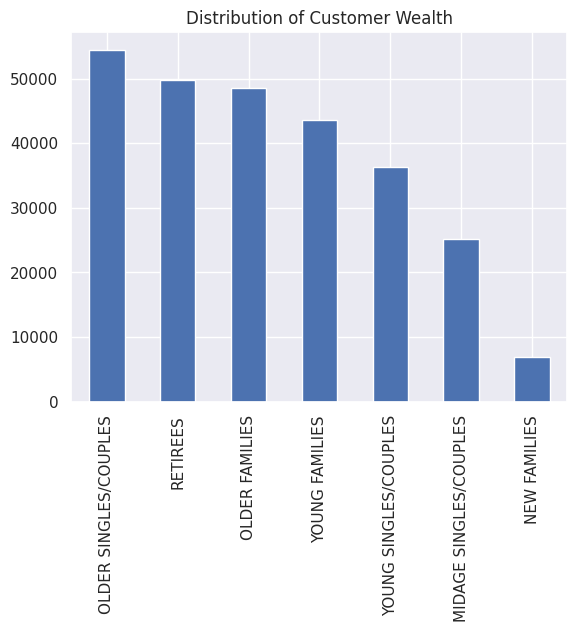

In [79]:

#Distribution of Customer Lifestage
combined_df['LIFESTAGE'].value_counts().plot(kind='bar', title='Distribution of Customer Lifestage');

Most of our customers are older singles/ Couples while the least number of our customers belonged to the 'new families' category.

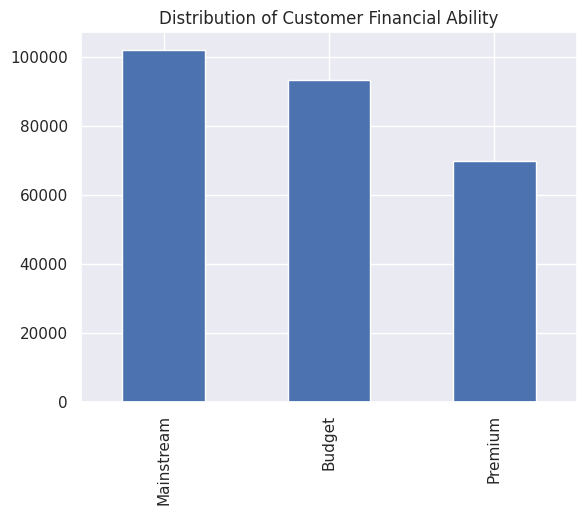

In [82]:
#Distribution of Customer Financial Ability
combined_df['PREMIUM_CUSTOMER'].value_counts().plot(kind='bar', title='Distribution of Customer Financial Ability');

Most of the customers are mainstream customers who are of average financial ability.

In [62]:
#lets look at revenue changes over the years
changes = pd.DataFrame(combined_df.groupby([combined_df.Date.dt.year])['TOT_SALES'].sum())
changes

,TOT_SALES
Date,
2018,965593.25
2019,967521.75


<Axes: title={'center': 'Revenue Collected in 2018 & 2019'}, ylabel='TOT_SALES'>

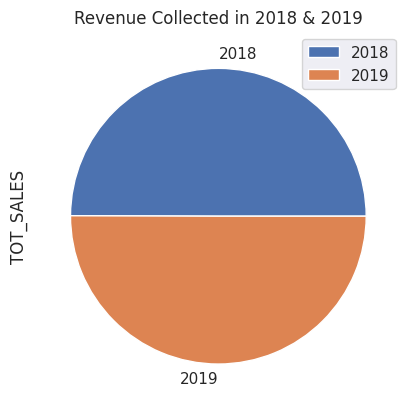

In [76]:
#lets plot these changes
changes.plot(kind='pie', y='TOT_SALES', title = 'Revenue Collected in 2018 & 2019')

The years 2018 and 2019 seem to have brought in roughly revenue for both years.

<Axes: title={'center': 'Number of Orders by Month'}, xlabel='Month', ylabel='Number of Entries'>

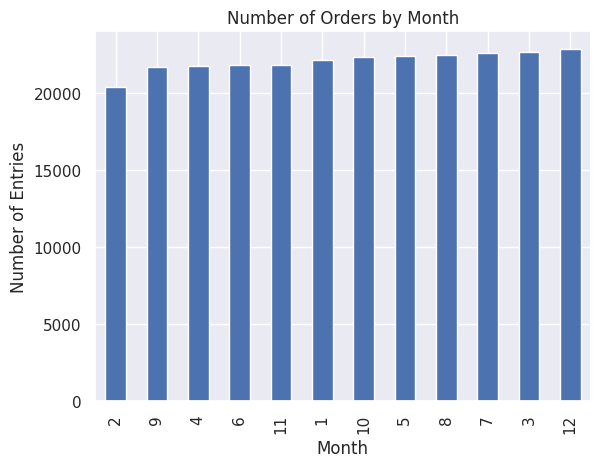

In [65]:
combined_df['Month'].value_counts().sort_values().plot(kind='bar', xlabel='Month', ylabel='Number of Entries', title='Number of Orders by Month')

Cumulatively the most purchases were done in December while February recorded the least purchases

<Axes: title={'center': 'Orders by Day of Week'}, xlabel='Week', ylabel='Number of Entries'>

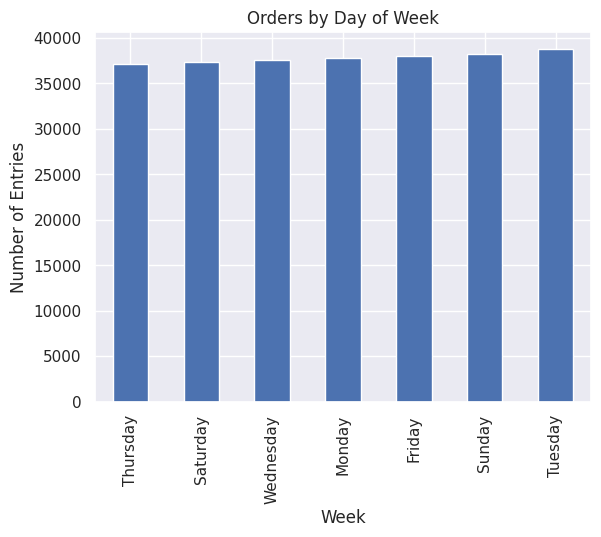

In [84]:
combined_df['DayOfWeek'].value_counts().sort_values().plot(kind='bar', xlabel='Week', ylabel='Number of Entries', title='Orders by Day of Week')

There are roughly the same number of purchases regardless of the week.

In [67]:
#lets import the calendar module
from calendar import month_name


In [68]:
#lets name the months
months = ['January', 'February', 'March', 'April',
          'May', 'June', 'July', 'August',
          'September', 'October', 'November', 'December']
